# Gestion des recommandations

## Recuperation des données

In [1]:
import json
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
import random

# Load the data
dir1 = "images"
dir2 = "ExifDatatest2.json"
dir = os.path.join(dir1, dir2)

data = pd.read_json(dir)
data['result'] = random.choices(["Yes", "No"], k=len(data))
print(data.head())
print(data.tail())

       theme                    image  width  height format orientation  \
0  Exoplanet          55_Cancri_b.jpg    960     540   JPEG     no exif   
1  Exoplanet         Gliese_876_e.jpg   1600     900   JPEG     no exif   
2  Exoplanet                XO-3b.jpg    960     540   JPEG     no exif   
3  Exoplanet  OGLE-2005-BLG-169Lb.jpg   1280     720   JPEG     no exif   
4  Exoplanet          Kepler-242b.jpg   1920    1080   JPEG     no exif   

    color_0 color_1    color_2   color_3   color_4   red  green  blue result  
0  darkgrey   black      black  darkgrey  darkgrey  0.15   0.15  0.15     No  
1  darkgrey   black       grey  darkgrey  darkgrey  0.15   0.15  0.15    Yes  
2     black   brown  lightgrey  darkgrey      grey  0.15   0.15  0.15     No  
3     black    grey   darkgrey  darkgrey      grey  0.15   0.15  0.15     No  
4     black   white      brown     black     brown  0.15   0.15  0.15     No  
        theme                                  image  width  height format 

## Labelisation des données

In [2]:
# on enleve les colonnes inutiles
data.drop('orientation', axis=1, inplace=True)
data.drop('image', axis=1, inplace=True)
data.tail()

,theme,width,height,format,color_0,color_1,color_2,color_3,color_4,red,green,blue,result
712,Voitures,2880,1620,JPEG,grey,darkgrey,lightgrey,darkgrey,grey,0.5,0.5,0.5,No
713,Voitures,1280,720,JPEG,darkgrey,grey,darkgrey,lightgrey,lightgrey,0.5,0.5,0.5,No
714,Voitures,2880,1620,JPEG,lightgrey,darkgrey,black,lightgrey,grey,0.5,0.5,0.5,No
715,Voitures,2880,1620,JPEG,darkgrey,lightgrey,black,grey,grey,0.5,0.5,0.5,No
716,Voitures,2880,1620,JPEG,lightgrey,darkgrey,grey,white,darkgrey,0.5,0.5,0.5,Yes


In [3]:
# label encoder
themeLabel = LabelEncoder()
data['theme'] = themeLabel.fit_transform(data['theme'])
widthLabel = LabelEncoder()
data['width'] = widthLabel.fit_transform(data['width'])
heightLabel = LabelEncoder()
data['height'] = heightLabel.fit_transform(data['height'])
formatLabel = LabelEncoder()
data['format'] = formatLabel.fit_transform(data['format'])
colorLabel = LabelEncoder()
data['color_0'] = colorLabel.fit_transform(data['color_0'])
data['color_1'] = colorLabel.fit_transform(data['color_1'])
data['color_2'] = colorLabel.fit_transform(data['color_2'])
data['color_3'] = colorLabel.fit_transform(data['color_3'])
data['color_4'] = colorLabel.fit_transform(data['color_4'])
RGBLabel = LabelEncoder()
data['red'] = RGBLabel.fit_transform(data['red'])
data['green'] = RGBLabel.fit_transform(data['green'])
data['blue'] = RGBLabel.fit_transform(data['blue'])
resultLabel = LabelEncoder()
data['result'] = resultLabel.fit_transform(data['result'])

data.tail()


,theme,width,height,format,color_0,color_1,color_2,color_3,color_4,red,green,blue,result
712,3,6,6,0,4,3,6,3,4,1,1,1,0
713,3,3,3,0,2,5,3,5,6,1,1,1,0
714,3,6,6,0,6,3,0,5,4,1,1,1,0
715,3,6,6,0,2,7,0,4,4,1,1,1,0
716,3,6,6,0,6,3,5,7,3,1,1,1,1


## Utilisation d'un arbre de décision

In [4]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
pourcent = 0.70
data_tc = data.drop('result', axis=1).iloc[0:int(len(data)*pourcent)]
data_result = data['result'].iloc[0:int(len(data)*pourcent)]
dtc = dtc.fit(data_tc , data_result)
data_result.iloc[0:5]

0    0
1    1
2    0
3    0
4    0
Name: result, dtype: int64

## On affiche l'arbre de decision

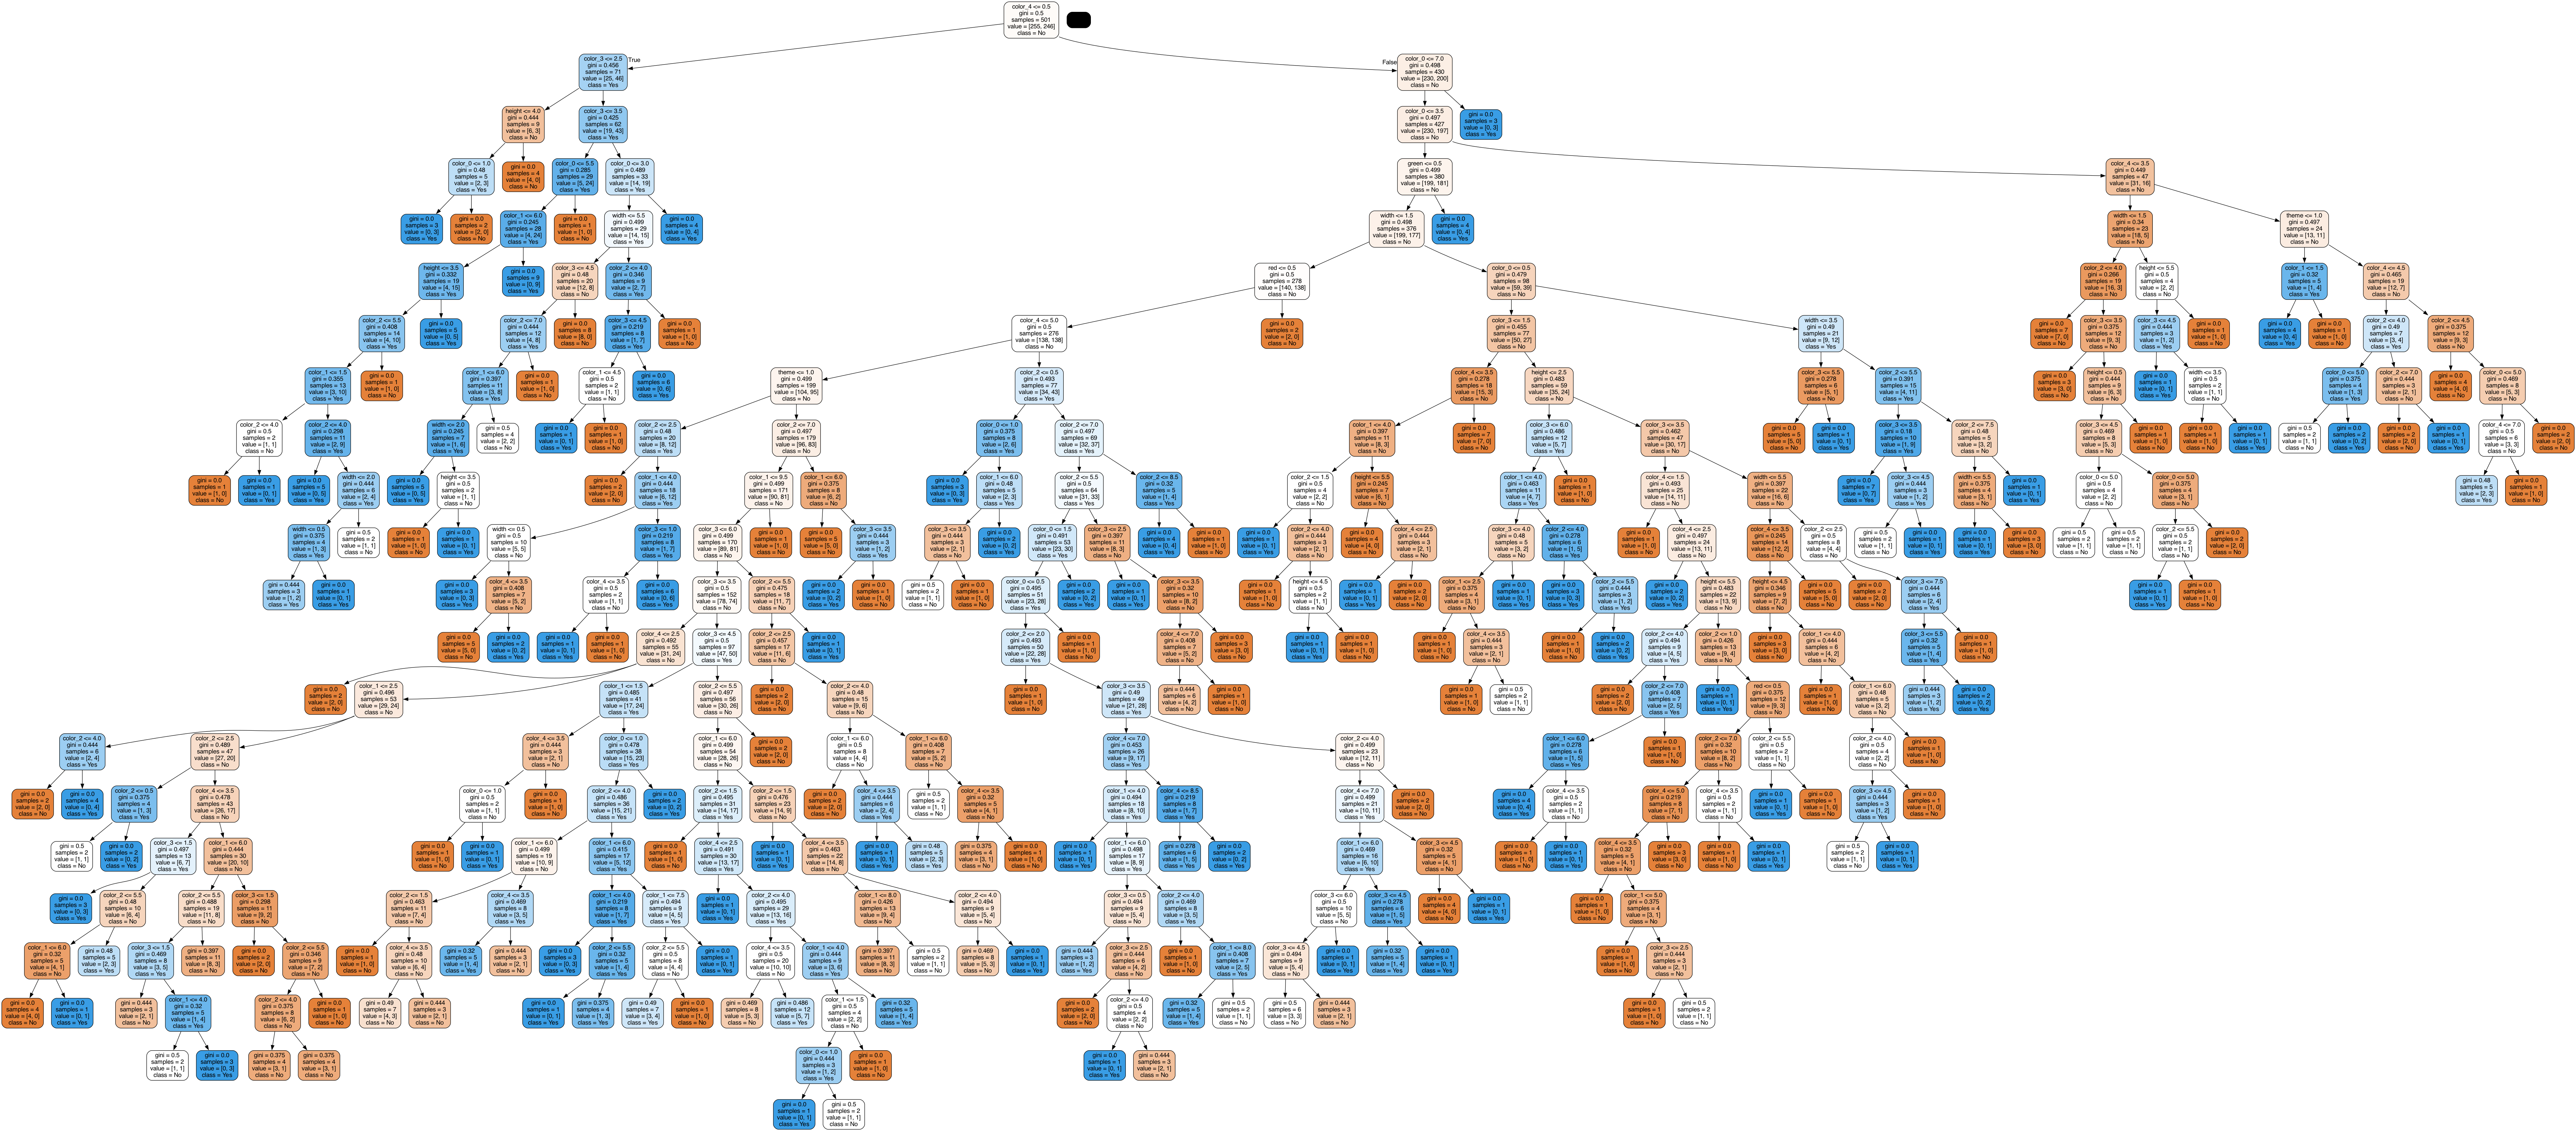

In [5]:

import graphviz
import pydotplus
from IPython.display import Image, display

dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names=data_tc.columns,
        filled=True, rounded=True, 
        class_names =
        resultLabel.inverse_transform(
        pd.DataFrame(data_result).result.unique())
        )
graph = graphviz.Source(dot_data) 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)
#pydot_graph.write_png('tree.png')


## Prediction



In [6]:
# avec la derniere image des voitures
prediction = dtc.predict(
    [[
        themeLabel.transform(["Pokemon2"])[0],
        widthLabel.transform([120])[0],
        heightLabel.transform([120])[0],
        formatLabel.transform(["JPEG"])[0],
        colorLabel.transform(["red"])[0],
        colorLabel.transform(["grey"])[0],
        colorLabel.transform(["blue"])[0],
        colorLabel.transform(["darkgrey"])[0],
        colorLabel.transform(["lightgrey"])[0],
        RGBLabel.transform([0.5])[0],
        RGBLabel.transform([0.15])[0],
        RGBLabel.transform([0.5])[0]
    ]]
)
print(resultLabel.inverse_transform(prediction))
print(list(zip(data,dtc.feature_importances_)))

['No']
[('theme', 0.012840579472931856), ('width', 0.08203079082588431), ('height', 0.045153243813968374), ('format', 0.0), ('color_0', 0.09633287023439743), ('color_1', 0.13957855164592248), ('color_2', 0.26968828116405424), ('color_3', 0.1836629913331317), ('color_4', 0.14968167128539792), ('red', 0.007745924579219859), ('green', 0.013285095645091826), ('blue', 0.0)]


/usr/local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
